In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt
from pytz import timezone
import statsmodels.api as sm

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.utils.np_utils import to_categorical
from keras import optimizers

Using TensorFlow backend.


In [3]:
np.random.seed(7)

In [4]:
def get_X_data():
    import dovahkiin as dk
    dp = dk.DataParser()
    X = dp.get_data("cu")
    return X

In [5]:
X = get_X_data()

In [6]:
X = pd.DataFrame((X["open"] + X["high"] + X["low"] + X["close"])/4, columns=["AvgPrice"])

In [7]:
X_prime = X.asfreq("10T").dropna()
# X_prime = X.asfreq("5D").dropna()

In [8]:
prediction_length = 8

In [9]:
# res = sm.tsa.seasonal_decompose(X_prime, model="multiplicative", freq=30, two_sided=True)
res = sm.tsa.seasonal_decompose(X_prime, model="multiplicative", freq=(prediction_length - 1)*2, two_sided=True)

In [10]:
# res_one_side = sm.tsa.seasonal_decompose(X_prime, model="multiplicative", freq=30, two_sided=False)

In [11]:
res.trend

,AvgPrice
date_time,
2003-08-01 09:00:00+08:00,NaN
2003-08-01 09:10:00+08:00,NaN
2003-08-01 09:20:00+08:00,NaN
2003-08-01 09:30:00+08:00,NaN
2003-08-01 09:40:00+08:00,NaN
2003-08-01 09:50:00+08:00,NaN
2003-08-01 10:00:00+08:00,NaN
2003-08-01 10:10:00+08:00,17913.464477
2003-08-01 10:30:00+08:00,17913.490089


In [12]:
# res = sm.tsa.seasonal_decompose(X_prime, model="additive", freq=30)

In [13]:
trend = res.trend.dropna()
noise = res.resid.dropna()
seasonal = res.seasonal.dropna()

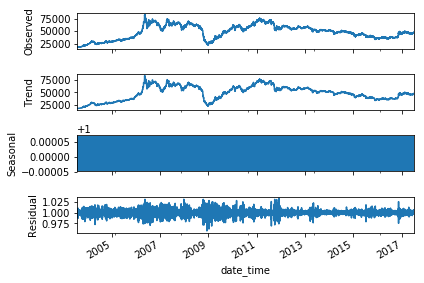

In [13]:
res.plot()

In [14]:
trend_std_scaler = StandardScaler()

In [15]:
scaled_trend = trend_std_scaler.fit_transform(trend)
scaled_trend = pd.DataFrame(scaled_trend, index = trend.index)

In [16]:
plt.cla(); plt.clf()

In [17]:
res.trend.plot()
scaled_trend.plot()

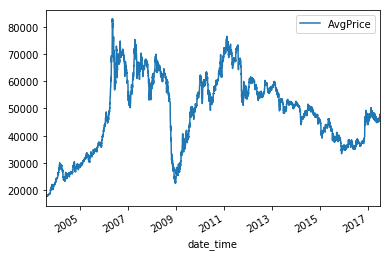

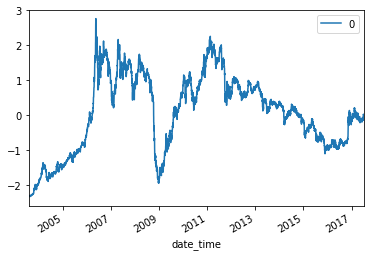

In [18]:
plt.show()

In [19]:
len(trend)

97535

In [20]:
LSTM(32, batch_input_shape=(1, 30, 1), 
         stateful=True, 
         return_sequences=True, 
         activation="relu",
         dropout=0.2
        )

In [43]:
batch_size = 5
time_series_step = 30
features = 1

In [44]:
model = Sequential()
model.add(
    LSTM(32, batch_input_shape=(batch_size, time_series_step, features), stateful=True, 
         return_sequences=True, 
         activation="relu",
         dropout=0.2
        ))

model.add(
    LSTM(32, batch_input_shape=(batch_size, time_series_step, features), stateful=True, 
         return_sequences=False, 
         activation="relu",
         dropout=0.2
        ))
    
model.add(Dense(32, activation="softmax"))
model.add(Dense(32, activation="softmax"))
model.add(Dense(8))

In [45]:
sgd = optimizers.SGD(lr=1e-8, decay=1e-9, momentum=0.9, nesterov=True, clipnorm=0.5)
adam = optimizers.Adam(lr=1e-4, clipnorm=0.5)
rmsprop = optimizers.rmsprop(lr=1e-3, decay=1e-8)

In [46]:
model.compile(loss="mse",
              optimizer=adam, 
              # metrics=["accuracy"]
             )

In [47]:
def timeseries_to_supervised(raw_time_series, lag):
    p = {}
    for i in range(1, lag+1):
        p["{}".format(i)] = raw_time_series.shift(i).fillna(0) - raw_time_series
    
    supervised_data = pd.Panel(p)
    return supervised_data

def non_shuffling_train_test_split(X, y, test_size=0.2):
    i = int((1 - test_size) * X.shape[0]) + 1
    X_train, X_test = np.split(X, [i])
    y_train, y_test = np.split(y, [i])
    return X_train, X_test, y_train, y_test

def create_supervised_X(raw_time_series, lag):
    supervised_X = timeseries_to_supervised(raw_time_series, lag)
    swaped_supervised_X = supervised_X.swapaxes(0, 1)
    return swaped_supervised_X

In [48]:
supervised_X = create_supervised_X(scaled_trend, lag=time_series_step)
supervised_X = supervised_X.fillna(0)
supervised_X_values = supervised_X.values

In [49]:
supervised_X.shape

(97535, 30, 1)

In [50]:
def create_future_y(time_series, future_steps):
    p = pd.DataFrame(index=time_series.index)
    for i in range(1, future_steps+1):
        p["{}".format(i)] = time_series.shift(-i).fillna(0) - time_series
    #p["0"] = raw_time_series
    # supervised_data = pd.DataFrame(p, index=time_series.index)
    return p

In [51]:
y = create_future_y(scaled_trend, 8)

In [52]:
supervised_X = supervised_X[535:]

In [53]:
y = y[535:191600]

In [54]:
supervised_X.shape

(97000, 30, 1)

In [55]:
# Normalization
(y == np.inf).any().any() or (y == -np.inf).any().any()

False

In [56]:
(supervised_X == np.inf).any().any().any() or (supervised_X == -np.inf).any().any().any()

False

In [57]:
for i in range(10):
    error = model.train_on_batch(supervised_X[i*100:i*100+100], y[i*100:i*100+100])
    print(error)

ValueError: Cannot feed value of shape (100, 30, 1) for Tensor 'lstm_4_input:0', which has shape '(5, 30, 1)'

In [58]:
model.fit(
        supervised_X.values, 
        y.values,
        epochs=1,
        batch_size=batch_size,
        verbose=1,
        shuffle=False,
        validation_split=0.2
)

Train on 77600 samples, validate on 19400 samples
Epoch 1/1
20595/77600 [======>.......................] - ETA: 1263s - loss: nan       

KeyboardInterrupt: 

In [42]:
model.layers[1].get_weights()

[array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]),
 array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]),
 array([ -6.46276740e-06,   1.30052177e-02,  -7.80390643e-07,
          3.20296321e-03,   3.54638145e-02,  -4.22507676e-03,
         -5.23563106e-04,   1.40108122e-02,   2.35872458e-02,
          7.39246357e-03,   3.88538591e-02,   1.59609342e-02,
          4.28240697e-02,   9.82606551e-04,   4.59257051e-02,
          4.78274033e-02,  -9.65968603e-04,   